# 布尔索引

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  是一个 Jupyter Notebook 的魔法命令(让 matplotlib 绘制的图形直接嵌入显示在 Notebook 单元格输出中，而不是弹出单独的窗口显示)
%matplotlib inline  

## 计算布尔值统计信息


In [2]:
pd.options.display.max_columns = 50

movie = pd.read_csv('movie.csv', index_col='title')
movie.head()

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,actor3,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


In [6]:
# 判断电影时长是否超过2小时
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [7]:
# 有多少时长超过2小时的电影
movie_2_hours.sum()

np.int64(1039)

In [8]:
# 超过2小时的电影的比例
movie_2_hours.mean()

np.float64(0.2113506916192026)

In [9]:
# 用 describe 输出一些该布尔series信息
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [10]:
# 实际上，dureation 这列是有缺失值的，要想获得真正的超过两小时的电影的比例，需要先删掉缺失值
movie['duration'].dropna().gt(120).mean()  # .gt(120) - 判断每个值是否大于 120（返回布尔值 True/False）

np.float64(0.21199755152009794)

In [11]:
# 统计fase和true值的比例
movie_2_hours.value_counts(normalize=True)  # normalize=True 参数表示返回比例而非绝对计数

duration
False    0.788649
True     0.211351
Name: proportion, dtype: float64

In [12]:
# 比较同一个dataframe中的两列
actors = movie[['actor1_fb', 'actor2_fb']].dropna()

(actors['actor1_fb'] > actors['actor2_fb']).mean()

np.float64(0.9777687130328371)

## 构建多个布尔条件

In [14]:
# 创建多个布尔条件
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.year < 2000) | (movie.year >= 2010)

criteria2.head()

title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [15]:
# 将这些布尔条件合成一个
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [16]:
# 在 pandas 中，位运算符 （& | ~）的优先级高于比较运算符，因此如果前面的条件3不加括号，就会报错
criteria3 = movie.year < 2000 | movie.year >= 2010  # （movie.year < (2000 | movie.year) >= 2010）

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

## 用布尔索引过滤

In [18]:
# 创建布尔条件
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.year < 2000) | (movie.year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [19]:
# 创建第二个布尔条件
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.year >= 2000) & (movie.year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [20]:
# 将两个条件用 | 运算符连接起来
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [21]:
# 用最终的布尔条件过滤数据
movie[final_crit_all].head()

,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,actor3,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
The Avengers,2012.0,Color,PG-13,173.0,Joss Whedon,0.0,Chris Hemsworth,26000.0,Robert Downey Jr.,21000.0,Scarlett Johansson,19000.0,623279547.0,Action|Adventure|Sci-Fi,703.0,995415,alien invasion|assassin|battle|iron man|soldier,English,USA,220000000.0,8.1
Captain America: Civil War,2016.0,Color,PG-13,147.0,Anthony Russo,94.0,Robert Downey Jr.,21000.0,Scarlett Johansson,19000.0,Chris Evans,11000.0,407197282.0,Action|Adventure|Sci-Fi,516.0,272670,based on comic book|knife|marvel cinematic uni...,English,USA,250000000.0,8.2
Guardians of the Galaxy,2014.0,Color,PG-13,121.0,James Gunn,571.0,Bradley Cooper,14000.0,Vin Diesel,14000.0,Djimon Hounsou,3000.0,333130696.0,Action|Adventure|Sci-Fi,653.0,682155,bounty hunter|outer space|raccoon|talking anim...,English,USA,170000000.0,8.1
Interstellar,2014.0,Color,PG-13,169.0,Christopher Nolan,22000.0,Matthew McConaughey,11000.0,Anne Hathaway,11000.0,Mackenzie Foy,6000.0,187991439.0,Adventure|Drama|Sci-Fi,712.0,928227,black hole|father daughter relationship|saving...,English,USA,165000000.0,8.6


In [22]:
# 使用 loc，对指定的列做过滤操作，可以清楚的看到过滤是否起作用
cols = ['imdb_score', 'content_rating', 'year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head()

,imdb_score,content_rating,year
title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0


In [26]:
# 用一个场部二表达式代替前面由短布尔表达式生成的布尔条件
final_crit_a2 = (movie.imdb_score > 8) & \
      (movie.content_rating == 'PG-13') & \
      ((movie.year < 2000) | (movie.year > 2009))
final_crit_a2.equals(final_crit_a)


True

## 用标签索引代替布尔索引

In [5]:
# 用布尔索引选取所有 stabbr == 'TX' 的行
college = pd.read_csv('college.csv')
college[college['stabbr'] == 'TX'].head()

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [6]:
# 用 stabbe作为行索引，然后用loc选取
college2 = college.set_index('stabbr')
college2.loc['TX'].head()

,instnm,city,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
stabbr,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [7]:
# 比较二者速度
%timeit college[college['stabbr'] == 'TX']

1.02 ms ± 20.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [8]:
%timeit college2.loc['TX']

559 μs ± 10.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
# 使用 stabbr 作为行索引用的时间
%timeit college2 = college.set_index('stabbr')

1.11 ms ± 6.64 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
# 使用布尔索引和标签选取多列
states = ['TX', 'CA', 'NY']
college[college['stabbr'].isin(states)]


,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,9885.0,0.2392,0.0685,0.1141,0.0804,0.0051,0.0058,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,500.0,0.4720,0.1140,0.1100,0.0760,0.0080,0.0020,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,14.0,0.2143,0.4286,0.3571,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,253.0,0.1265,0.4743,0.2253,0.0672,0.0079,0.0000,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7528,WestMed College - Merced,Merced,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,15623.5
7529,Vantage College,El Paso,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7530,SAE Institute of Technology San Francisco,Emeryville,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,9500
7533,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [12]:
college2.loc[states].head()

,instnm,city,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
stabbr,,,,,,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,0.6739,0.0798,0.1414,0.0090,0.0039,0.0000,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,0.5126,0.1034,0.3093,0.0500,0.0064,0.0038,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,0.5104,0.0507,0.3888,0.0293,0.0122,0.0000,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,0.5854,0.1508,0.2207,0.0076,0.0073,0.0013,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,0.5225,0.0841,0.3166,0.0087,0.0036,0.0017,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


## 用唯一和有序索引选取

In [15]:
# 读取 college 数据集，使用 stabbr 作为行索引，检查行索引是否有序
college2.index.is_monotonic_increasing

False

In [16]:
# 将 college2 排序，存储成另一个对象，查看其是否有序
college3 = college2.sort_index()
college3.index.is_monotonic_increasing

True

In [18]:
# 从这三个 detaframe 选取 tx 比较速度
%timeit college[college['stabbr'] == 'TX']

1.08 ms ± 19.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%timeit college2.loc['TX']

568 μs ± 11.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
%timeit college3.loc['TX']

90 μs ± 1.19 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
# 使用 instnm 作为行索引，检测行索引是否唯一
college_unique = college.set_index('instnm')
college_unique.index.is_unique

True

In [23]:
# 用布尔索引选取 Stanford university 的数据
college[college['instnm'] == 'Stanford University']

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,7018.0,0.3752,0.0591,0.1607,0.1979,0.0114,0.0038,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [24]:
# 用行索引标签选取 Stanford university 的数据
college_unique.loc['Stanford University']

city                  Stanford
stabbr                      CA
hbcu                       0.0
menonly                    0.0
womenonly                  0.0
relaffil                     0
satvrmid                 730.0
satmtmid                 745.0
distanceonly               0.0
ugds                    7018.0
ugds_white              0.3752
ugds_black              0.0591
ugds_hisp               0.1607
ugds_asian              0.1979
ugds_aian               0.0114
ugds_nhpi               0.0038
ugds_2mor               0.1067
ugds_nra                0.0819
ugds_unkn               0.0031
pptug_ef                   0.0
curroper                     1
pctpell                 0.1556
pctfloan                0.1256
ug25abv                 0.0401
md_earn_wne_p10          86000
grad_debt_mdn_supp       12782
Name: Stanford University, dtype: object

In [25]:
# 比较两种方法的速度
%timeit college[college['instnm'] == 'Stanford University']

972 μs ± 8.94 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
%timeit college_unique.loc['Stanford University']

75.8 μs ± 1.19 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
# 使用 city 和 stabbr 两列作为行索引，并进行排序
college.index = college['city'] + ',' + college['stabbr']
college.sort_index(inplace=True)
college.head()

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
"Aberdeen,SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,1693.0,0.8435,0.0230,0.0319,0.0112,0.0207,0.0030,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen,SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,705.0,0.6525,0.1163,0.0780,0.0128,0.0156,0.0000,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen,WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,1121.0,0.7110,0.0169,0.0946,0.0214,0.0312,0.0054,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene,TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,1576.0,0.7126,0.0742,0.1472,0.0076,0.0019,0.0006,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864
"Abilene,TX",Texas College of Cosmetology-Abilene,Abilene,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,87.0,0.7126,0.0805,0.1839,0.0230,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,0.6954,0.0000,0.3780,17300,PrivacySuppressed


In [29]:
# 选取所有 miami ， fl 的大学
college.loc['Miami,FL'].head()

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
"Miami,FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,56.0,0.0179,0.0714,0.9107,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami,FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,708.0,0.0071,0.0523,0.9407,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami,FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami,FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami,FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,649.0,0.0894,0.1263,0.7735,0.0046,0.0,0.0015,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [38]:
# 速度比较
%timeit college[(college['city'] == 'Miami') & (college['stabbr'] == 'FL')]

1.62 ms ± 20.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
%timeit college.loc['Miami,FL']


83.6 μs ± 1.05 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [39]:
# 判断这两个条件是否相同
college[(college['city'] == 'Miami') & (college['stabbr'] == 'FL')].equals(college.loc['Miami,FL'])

True

## 使用 matplotlib 画比例图

In [48]:
slb = pd.read_csv('msft20.csv', index_col='date', parse_dates=['date'])  # parse_dates=['date']：将 date 列自动解析为 Pandas 的 datetime 类型
slb.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.250,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.250,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.500,93.063,30.0381,60801200,0.0
1999-10-22,93.563,93.875,91.750,92.688,29.9171,43650600,0.0
1999-10-25,92.000,93.563,91.125,92.438,29.8364,30492200,0.0


In [49]:
# 选取close这列，用describe返回统计信息
slb_close = slb['close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary


count    5034.000000
mean       46.756929
std        27.664050
min        15.150000
10%        24.946000
50%        32.215000
90%        92.000000
max       141.570000
Name: close, dtype: float64

In [50]:
# 用布尔索引选取最高和最低10%的数据
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

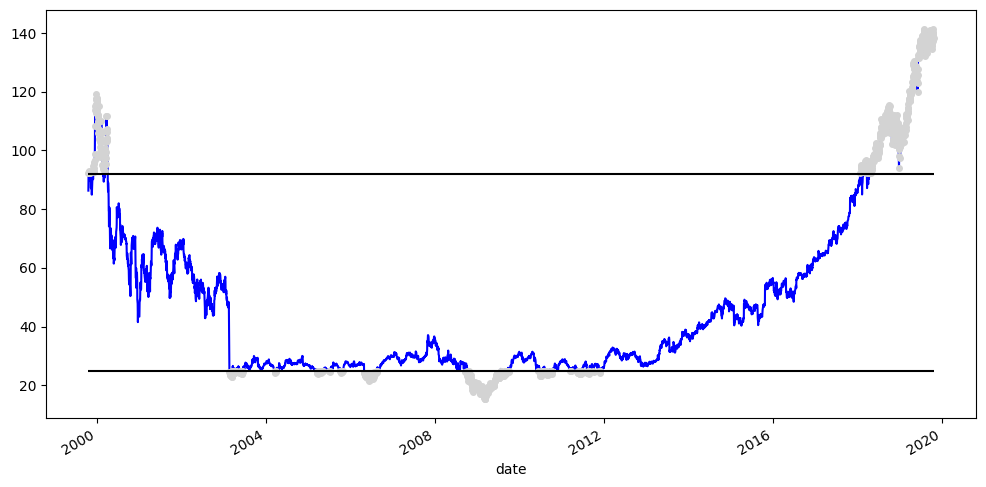

In [53]:
# 过滤出的数据使用灰色，所有的数据使用蓝色，用 matplotlib 再十分之一和十分之九分位数位置画横线

slb_close.plot(color='blue', figsize=(12,6))  # 绘制主时间序列（蓝色线条）
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')  # 叠加绘制顶部和底部10%的数据点（灰色圆点标记）
'''
marker='o'：使用圆形作为数据点标记
style=' '：不显示连接线（空格表示无线条样式）
ms=4：设置标记大小(marker size)为4磅
color='lightgray'：将标记颜色设为浅灰色
'''

# 获取x轴范围（使用criteria的时间索引）
xmin = criteria.index[0]
xmax = criteria.index[-1]

plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='black')  # 在10%和90%分位数位置绘制黑色水平参考线
'''
y=[lower_10, upper_10]：

同时绘制两条水平线
    lower_10 代表10%分位数（数据分布的底部临界值）
    upper_10 代表90%分位数（数据分布的顶部临界值）
    
xmin/xmax：
    使用 criteria.index 的时间范围（确保参考线贯穿整个图表）
    xmin 取第一个时间点，xmax 取最后一个时间点

color='black'：
    将参考线颜色设为黑色
    与主图表的蓝色趋势线和灰色极值点形成视觉对比
'''

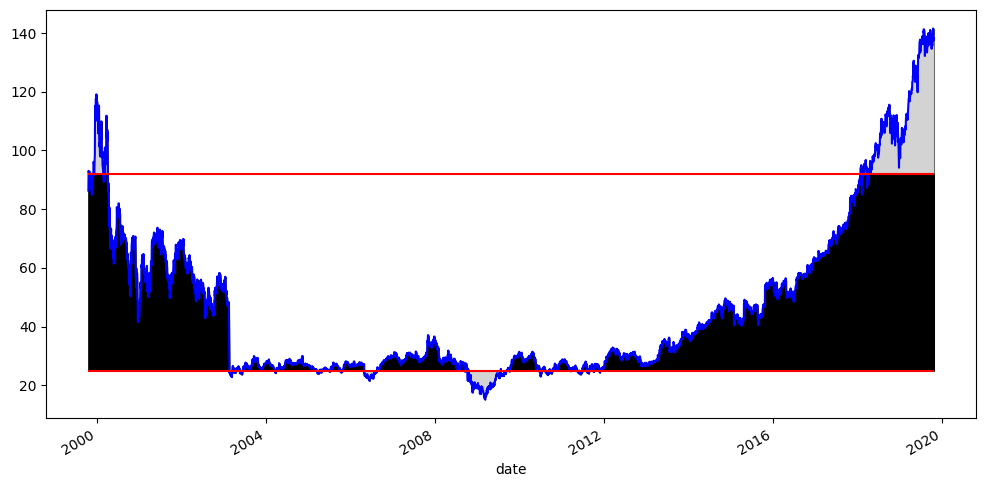

In [56]:
# 使用 fill_between 可以再两条线之间填充颜色
slb_close.plot(color='blue', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='red') 
plt.fill_between(x=criteria.index, y1=lower_10, y2=slb_close.values, color='black')  # 在10%分位线 (lower_10) 和实际股价线之间填充黑色区域

# 填充10%分位线以下和90%分位线以上的区域
plt.fill_between(x=criteria.index, y1=lower_10, y2=slb_close.values, where=slb_close < lower_10, color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10, y2=slb_close.values, where=slb_close > upper_10, color='lightgray')

## 翻译 sql 的 where 语句

In [77]:
employee = pd.read_csv("employee_sample.csv")
employee.DEPARTMENT.value_counts().head()  # 选取 employee DataFrame 中的 DEPARTMENT 列（部门列）


DEPARTMENT
Engineering                      7
Houston Fire Department (HFD)    5
Parks & Recreation               4
Houston Police Department-HPD    4
Houston Airport System (HAS)     4
Name: count, dtype: int64

In [78]:
employee.GENDER.value_counts()

GENDER
Male      15
Female     9
Name: count, dtype: int64

In [79]:
employee.SALARY.describe().astype(int)

count        24
mean      43201
std       21843
min       26125
25%       30347
50%       37565
75%       43618
max      107962
Name: SALARY, dtype: int64

In [80]:
# 创建布尔条件，并从['NAME', 'DEPARTMENT', 'GENDER', 'SALARY']四列选取
depts = ['Houston Police Department-HPD',  'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.SALARY >= 20000) & (employee.SALARY <= 40000)


In [81]:
criteria_final = criteria_dept & criteria_gender & criteria_sal

In [82]:
select_columns = ['NAME', 'DEPARTMENT', 'GENDER', 'SALARY']
employee.loc[criteria_final, select_columns].head()

,NAME,DEPARTMENT,GENDER,SALARY
12,Sofia1,Houston Police Department-HPD,Female,26125
16,Sofia2,Houston Fire Department (HFD),Female,26125


In [83]:
# 使⽤between选20000到40000之间的薪水
criteria_sal = employee.SALARY.between(20000, 40000)


In [84]:
# 排除最长出现的两家
top_2_depts = employee.DEPARTMENT.value_counts().index[:2]
criteria = ~employee.DEPARTMENT.isin(top_2_depts)
employee[criteria].head()

,NAME,GENDER,RACE,DEPARTMENT,YEARS EXPERIENCE,SALARY
7,Sofia,Female,Black,Parks & Recreation,23,26125
8,Dean,Male,Black,Parks & Recreation,3,33592
9,Zach,Male,White,Parks & Recreation,4,37565
10,Zach2,Male,White,Parks & Recreation,4,37565
11,Aria1,Female,Black,Houston Police Department-HPD,8,43618


In [ ]:
# 功能一样的sql语句是
''' 
SELECT 
    * 
FROM 
    EMPLOYEE 
WHERE 
    DEPARTMENT not in
    (
        SELECT 
            DEPARTMENT 
        FROM (
            SELECT
                DEPARTMENT,
                COUNT(1) as CT
            FROM
                EMPLOYEE
            GROUP BY
                DEPARTMENT
            ORDER BY
                CT DESC
            LIMIT 2
            )
    );
'''